<h1 style="color:red" align="center">Neural Networks: The basics made for all</h1>
<p align="center">By Bastien Lhopitallier and Robin Sobczyk</p>

<h2 style="color:green" align="center">Course 5: Going further</h2>

In this course you will:
- get a vague idea of how vast is the world of deep learning

This course does not aim to teach much, but rather to provide starting points for paths to go down yourself in order to learn more about neural networks.

<h3 style="color:skyblue">Deep learning use cases and their type of networks</h3>

<h4 style="color:DarkViolet">Classification and linear networks</h4>

A first approach to classification of raw numerical data is often linear regressions. Linear networks somehow try to do piecewise linear regressions, and are hence usually usefull at those classification tasks, when the numbers are somewhat independent and no other geometrical consideration is relevant. However, while linear networks often provide an acceptable baseline for these problems, other models might be more suitable. Some models are designed to provide better results, or to provide similar results but faster and/or at a lower computational cost.

<h4 style="color:DarkViolet">Images and Convolution Neural Networks</h4>

Convolution Neural Networks were suggested for Image data because of two things:
- for images, pixels that are near each others aren't independent
- if you shift an object in an image, the nature of the object has not changed. Having a duck on the left or on the right of your picture does not change it being a duck.

The convolution is a mathematical operation that is equivariant to shift. It means, if you provide a shifted input to the convolution, you will get a shifted output. Mostly, if you have a filter that recognizes a duck, you don't mind having a shifted picture to recognize a duck, you only want to know if **somewhere** a duck was recognized. Hence, convolution is perfect for pattern recognition when the pattern might be shifted anywhere on your picture.

<div style="max-width:1000px;margin-right: auto; margin-left: auto;">

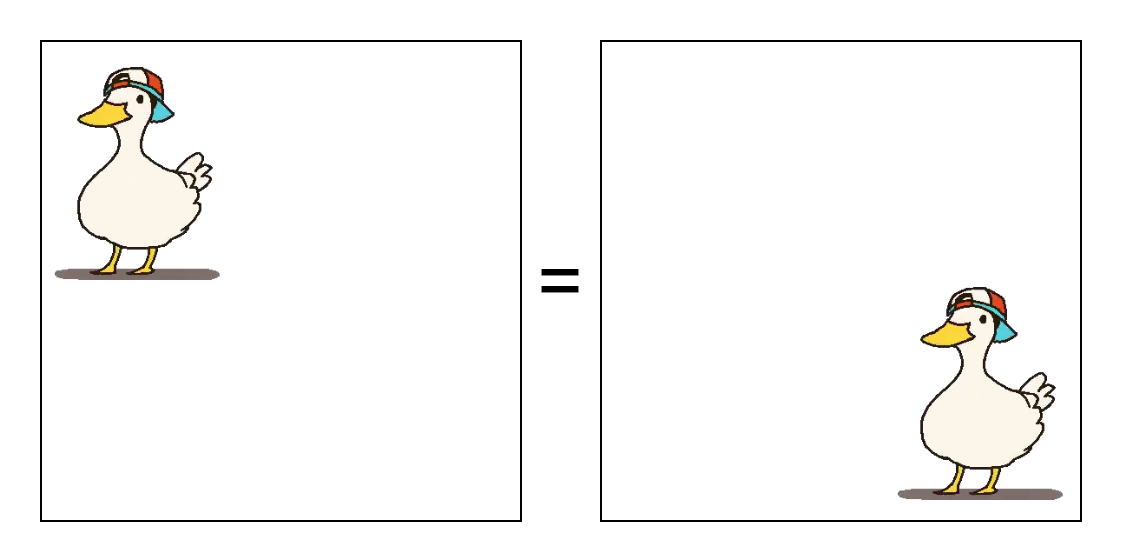

</div>

Image models might also be used for data that are not images at first but that might meaningfully be represented as images. It is the case for audio, where you can represent an audio file as a Frequency x Time x Amplitude image, i.e. a spectrogram. Representing Frequency in a way that makes the patterns you are looking for shift-invariant is useful (for example, picking log scale for frequencies).

<div style="max-width:800px;margin-right: auto; margin-left: auto;">

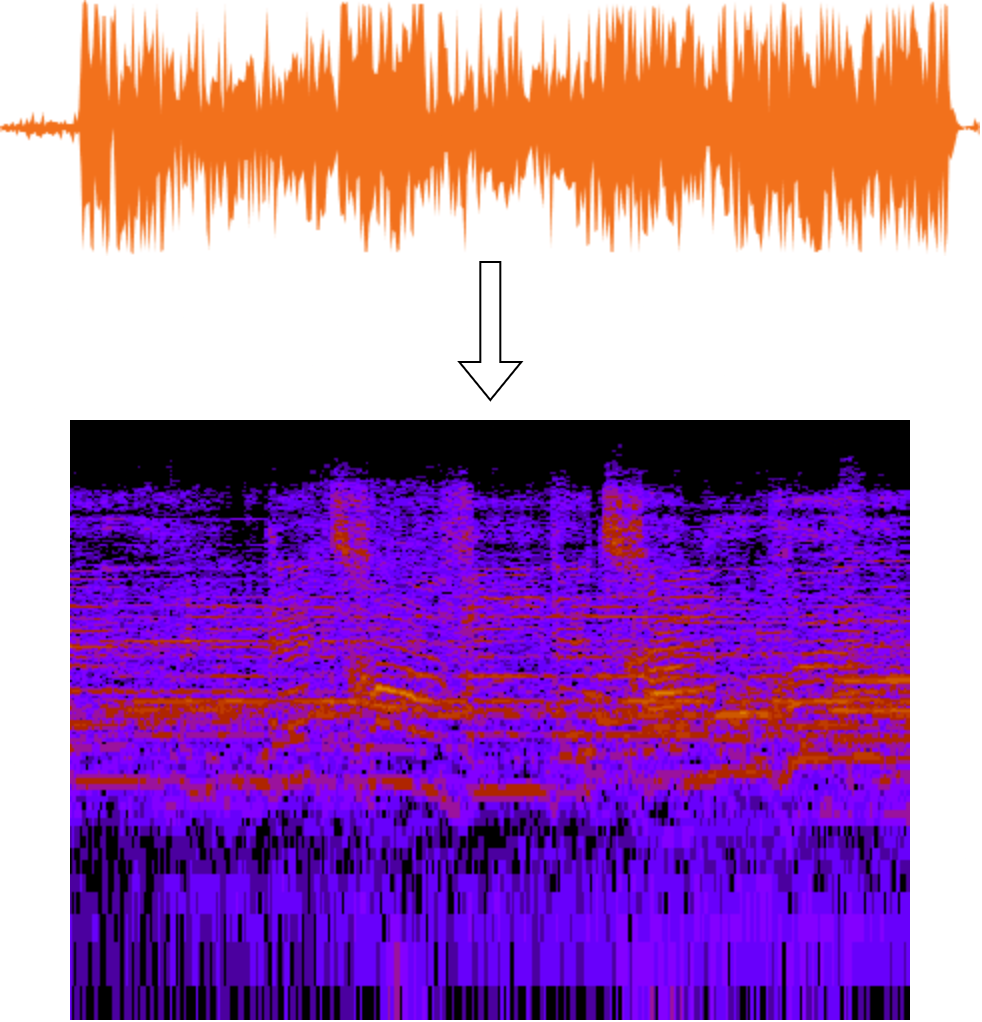

</div>

In those situations, CNNs might also exhibit good performances.

Once again, CNNs are not state of the art anymore, but are still very reliable baselines.

<h4 style="color:DarkViolet">Data compression through encoder/decoder architectures and probability modelisation</h4>

Sometimes, Neural Networks can be used to deduce compressed representations of data. This is mostly the case of auto-encoders, which are networks composed of two parts:
- the encoder, which aims to reduce the dimension of the data and represent it in a latent space
- the decoder, which aims to restore the initial data from a latent representation provided by the encoder

This architecture is often represented as hourglass-shaped network, with the encoded data/the latent space being in the middle.

<div style="max-width:1000px;margin-right: auto; margin-left: auto;">

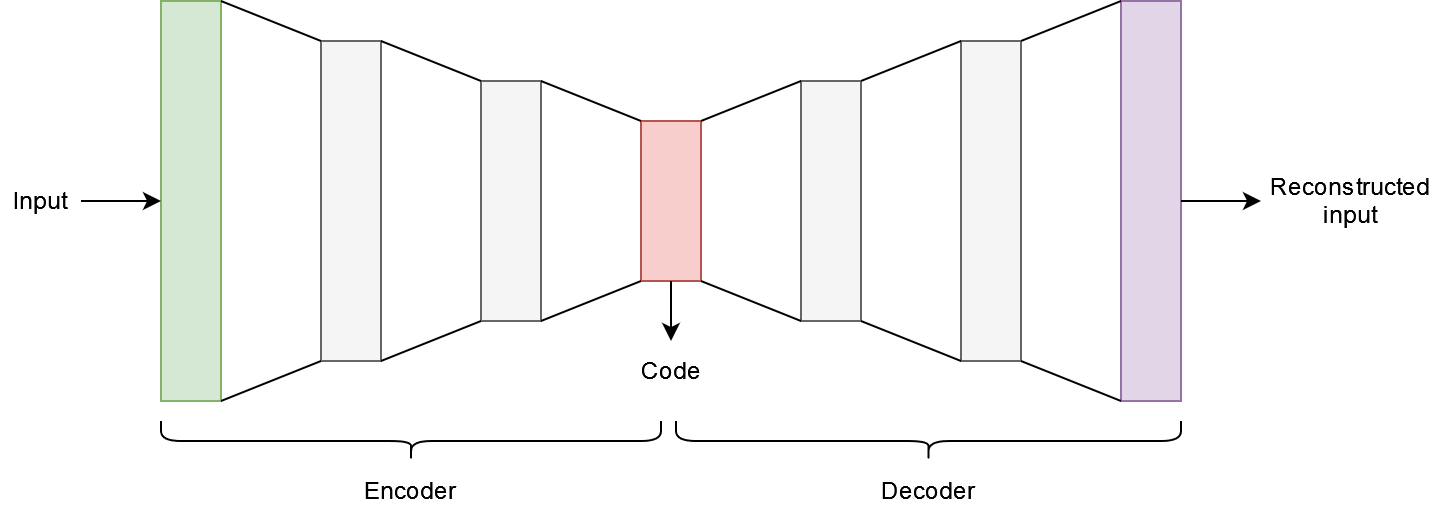

</div>

Auto-encoders have evolved, and sometimes it becomes more useful to provide a distribution rather than a code, which resulted in the Variational Auto-Encoders. In VAEs, the latent space in not a code anymore, but rather a probability over the code. Think of it as, instead of giving $n$ values for a latent representation $z_1,...,z_n$, you give $n$ mean values $\mu_1,...,\mu_n$ and $n$ standard deviations terms $\sigma_1,...,\sigma_n$ that provide e.g. gaussian estimates of the possible distributions of the $z_1,...,z_n$. Hence, your latent representation is not a code anymore, but a distribution.

<div style="max-width:1000px;margin-right: auto; margin-left: auto;">

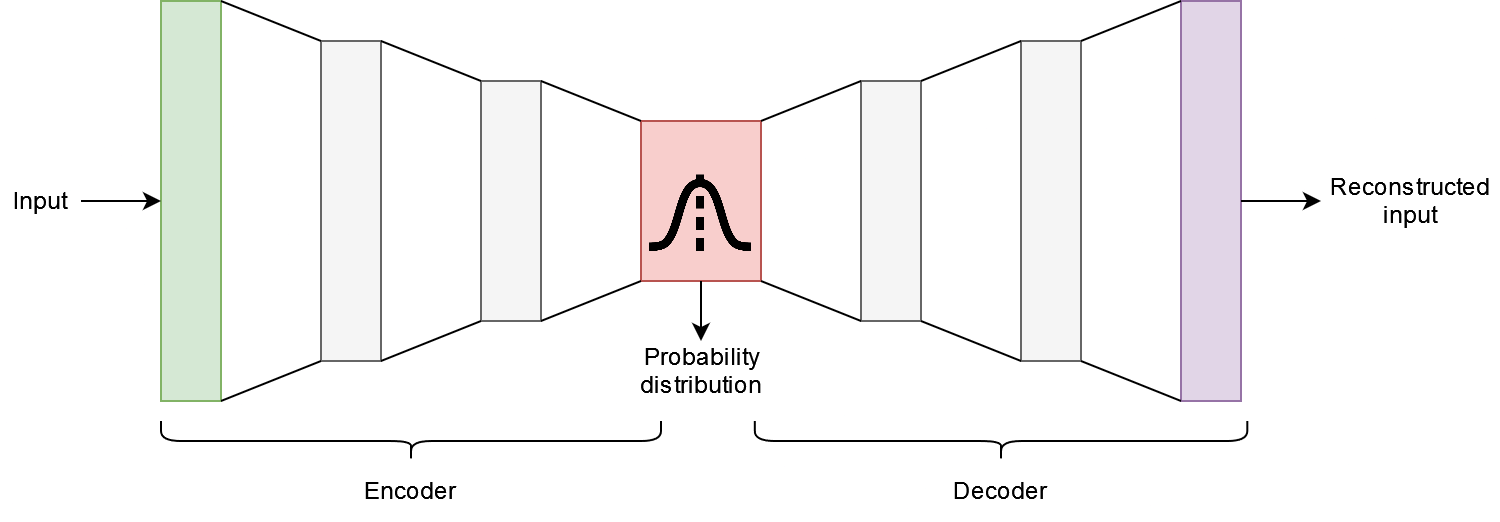

</div>

Those might be used to study statistical effects over the data in a summed up model, but also to provide a way of generating data, by just sampling the latent distribution and feeding it back to the decoder.

<h4 style="color:DarkViolet">Sequences and RNN</h4>

For sequences, it is common to use Recurrent Neural Networks. A RNN is different from a feed-forward neural network because its computation flow is not an acyclic graph anymore. Some informations are fed back into the network at the next activation step. This allows informations from the past activation to be kept for the next activation, allowing short term memory and contextual processing. Hence, these networks are useful to deal with sequences, where time is important and should be taken into account.

<h4 style="color:DarkViolet">Natural Language Processing, tokenization, embeddings, attention and Large Language Models</h4>

The most common type of sequences in everyday life is human language. Should it be text or speech, it's a sequence of words. Natural Language Processing (NLP) is the domain focused on dealing with this kind of data, it has various subfields like text to speech and speech to text models, but also document clustering, next word prediction, information extraction etc.

Most often, the words end up being replaced by what is called tokens, this is tokenization. A token is just a placeholder associated to a word, so that the model does not have to deal with a sequence of letters but an unbreakable representation of a word. Quite often, some words are tokenized specifically. For example, it would be weird to tokenize differently every tense of a verb. Hence, before tokenization, another process is run. This process aims to represent the word by its semantic root. This preprocessing is called stemming and is also subject to active research.

Once the words have been tokenized, they are often translated in a vector space that aims to encapture some of their semantic properties through geometrical features. This is called embedding, the words are embedded in a vector space.  
When they are not properly embedded, they might be encoded through what is called one-hot encoding. A one-hot encoding maps for example any word of a vocabulary of size $n$ to a vector of size $n$ where all dimensions are 0 except the one corresponding to the id of the word. Here is a quick example :
> The objective is to translate the sentence "I love cats" in one-hot encoding. We have a vocabulary of size 3 : "I", "love" and "cats".  
> Then, we can encode each word in 3 dimensional vectors:
> - "I" -> [1,0,0]
> - "love" -> [0,1,0]
> - "cats" -> [0,0,1]
>
> Finally, the sentence is one-hot encoded as a matrix of size $sentence\_length\times vocab\_size$

As said in the previous sections, RNNs are good at NLP, but they have been partly deprecated by the attention mechanism, which is what is employed in transformers. Read the paper [Attention Is All You Need](https://arxiv.org/abs/1706.03762) for more details. Summed up, attention was introduced in RNNs, and was later showed to be sufficient in itself for NLP, deleting the need of recurrence, improving then the ease of parallelization and the speed of computations.

Nowadays, most Large Language Models (BERT, GPT etc) are mainly next word predictors relying on stacked transformers. They tend to perform better when given a precise context. LLMs have been shown to be bags of simulators, i.e. they encapture multiple distributions for predictions, and prompting them correctly is equivalent to selecting the distribution that suits the most the studied task. However, it is hard to locate precisely those distributions, know which one does what and count them.


<h4 style="color:DarkViolet">Reinforcement Learning and distributed learning</h4>

Reinforcement Learning is about training a model to learn to act in environments. There is no clear dataset, only an environment in which the model acts, making the model an actor. Then, based on the consequences of its actions, the actor is rewarded or punished, and should train from that. Some algorithms are maintaining a model of the environment for prediction, making them model-based, and opposed to model-free algorithm.

Also, as the environment is almost never fixed, RL is a domain in which distributed learning brings a lot. Being able to learn from different actors evolving in parallel in the same environment but acting slightly differently allows for a faster learning and more robust models. Distributed algorithms might be synchronous (all actors act at the same time, and the learning happens after), asynchronous, partially synchronous... There is plenty of different reinforcement learning algorithms.

<h4 style="color:DarkViolet">Federated learning</h4>

Algorithms for distributed learning can be leveraged for federated learning also. This allows several users to contribute to training a model while everyone keeps their data locally. The main difference with distributed learning is that the learning is made locally by each actor, ensuring privacy. Distributed learning is meant to distribute a dataset among actors to leverage computational power of parallelization, while federated learning is meant to train on more heterogeneous data, as each actor might not have data that can be compared with other actors. For example, industries could do federated learning, and car industries would train on tire data, while aeronautical industries would train on wings data.

<h4 style="color:DarkViolet">Graph Neural Networks</h4>

Graph Neural Networks are neural networks receiving as inputs graphs (often a list of nodes with attributes paired to an adjacency matrix), and used for a variety of cases. They can be used for label prediction, edge prediction, to simplify, optimize or transforms graphs etc. Although other types of operations exist, GNNs often rely on 3 types of operations:
- Message Passing, which is based on diffusion of functions through the graph structure
- Convolutions, which are closer to spectral operations on graphs
- Attention, which is derived from the attention mechanism from NLP

<h4 style="color:DarkViolet">Bioinspired AI, Spiking Neural Networks and local learning</h4>

Neural networks are also used in relation with what is observed in brains and natural neural structures. This is called bioinspired AI. This field can go from aligning models with their biological counterparts (e.g. CNNs and the V1 area of the brain) to trying to replicate biological neurons in an artificial way. This led to the creation of Spiking Neural Networks (SNNs), which function in real time through spiking and not in waves of activations like most artificial neural networks. SNNs have been proved to be more expressive that regular artificial neural networks, but still can't be properly trained, as they are not subject to gradient descent. Instead, another technique called local learning is used, and is based on the cerebral plasticity. Local learning is less efficient on computers and requires lots of computations, making the training of SNNs harder and longer.

<h4 style="color:DarkViolet">Geometry and Topology</h4>

There are some models that are specialized in extracting or predicting geometric and topological features. This is the case of models that try to predict a mesh from a point cloud for example. Another notable use is protein structure prediction, like AlphaFold, which aims to predict the 3D structure of a protein mainly from its sequence.

Models relying on topological invariants also exist, and allows to study for example data that might not exhibit euclidean structure.

<h4 style="color:DarkViolet">Memory in neural networks</h4>

Sometimes, it is desirable to have a memory of some sort in neural networks. While short term memory has been discussed above, there are ways to achieve longer term memories. A common way to produce a memory is through *vector databases* that store the activations of the neural network at a specific point. That way, the network can find a memory in the database and "relive" it through activating on the stored memory.

Another kind of memory is the one exhibited by ChatGPT. ChatGPT gets data from the discussion context, and exhibits what is called *In-Context Learning*. This means that the model is able to extract data from a specific context. In a chat, the context is composed of the previous messages, allowing the model to extract past data from there. The Memory feature provided by OpenAI just adds some extra informations deduced at the prompt level in a hidden way. Instead of getting the pure prompt, the model will be prompted with the original prompt but also with added informations extracted and stored as "memories". The model is just inferring data, exporting it, then reimporting it at every activation to simulate memory, while it is closer to having a sketch pad with the memories written on it and rereading it every time.

Long term memory can also be achieved by Hopfield Networks, which are a kind of associative memory. These networks tend to be closer to biological memory as the memory is stored solely in the weights of the network.

<h4 style="color:DarkViolet">Automated Machine Learning, meta-learning and Neural Architecture Search</h4>

It is interesting to know that sometimes neural networks can be used to enhance the training procedures or even automate them. Automated Machine Learning can be achieved like that, through being able to automatically derive the type of a problem and which kind of solutions can be applied to it. Predicting which types of models could perform well on a given problem, and then providing estimates of near-optimal parameters to train the predicted model allows to automate the whole pipeline of applying a network to a problem.

This is somehow linked to the problems of meta-learning, which can be summed up as "learning to learn". In this field, networks are designed to work on several problems of the same type, and to optimize their learning time with each new problem encountered. The core ideas behind are:
- leveraging knowledge acquired from past problems
- identifying instances that are more important than others etc.

Finally, another domain that could be linked to auto-ML is Neural Architecture Search. In NAS, the objective is to automate the task of designing an efficient network architecture for a given task. Hence, rather than having a known model learning on a given problem, it would be possible to have a specific network designed for this problem in particular and optimized for it.

<h3 style="color:skyblue">Tricks</h3>

<h4 style="color:DarkViolet">Residual connections</h4>

Residual connections are connections that "skip" some computation blocks.

<div style="max-width:400px;margin-right: auto; margin-left: auto;">

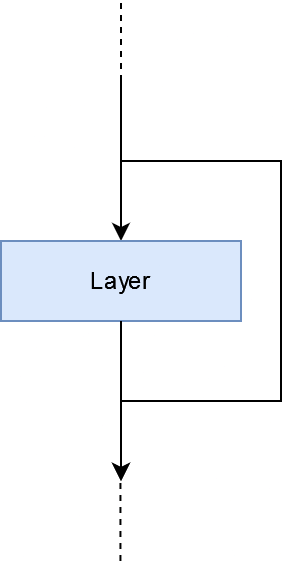

</div>

The residual connections allow for a better gradient flow as there is a direct gradient backpropagation through the added edge. This solves the problems of gradient explosion and vanish. Often, the skip connection merges back with the main path through an addition, but a concatenation can happen as well.

<h4 style="color:DarkViolet">Dense blocks</h4>

Dense blocks leverage residual connections to connect each layer to every deeper layers in the block. That way, every layer in the block gets as input every output of the earlier layers of the block.

<div style="max-width:1000px;margin-right: auto; margin-left: auto;">

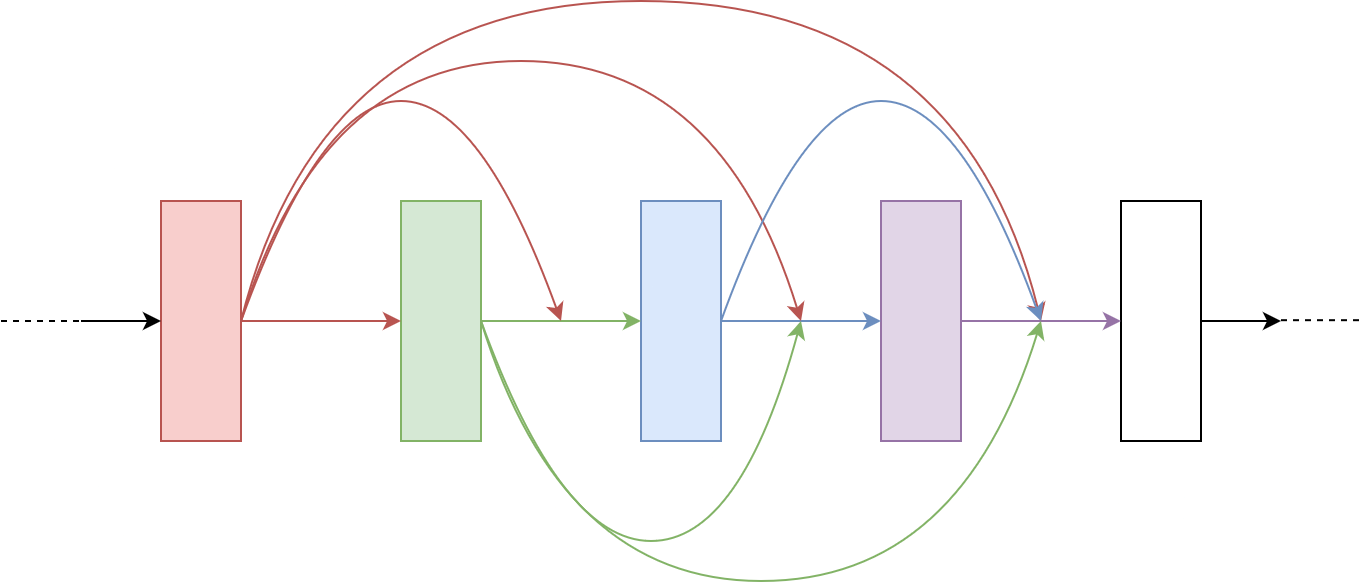

</div>

Dense blocks allow for a better gradient flow but also for feature reuse across the block, sometimes enhancing the parameter efficiency of the network (i.e. less parameters are required for the same task), while slightly increasing its memory usage. This allows for faster training for example.

<h4 style="color:DarkViolet">Types of loss</h4>

The most common types of loss are regression losses and categorical losses. Regression losses are meant to train networks on mapping inputs to continuous data while categorical losses are used when mapping data to classes, or discrete finite data.

However, some other specific types of losses exist.
A loss that aims to maximize the right output while minimizing the wrong ones in the same formula is said to be contrastive.  
A loss that aims to prevent the parameters from diverging (like the norm of the weights) is said to be a regularization loss.  
A loss that aims to ensure an input is properly restored (for example in auto-encoders) is often called a reconstruction loss.

Other types of loss exist, and they are as diverse as their use cases. Remember to check what has been done for comparable tasks when designing a network, there are plenty of ideas out there in papers.

Also, losses can be added to benefit from all the effects of the different terms, and they can also be weighted to find the right trade off and balance the effects of each term.

<h4 style="color:DarkViolet">Dataset augmentation</h4>

It is common that a network is not robust to some features that are not exhibited in the base dataset. For example, a dataset might be too clean and the network might then be oversensitive to noise. A common way to solve these problems is to augment your dataset by creating noisy data from the cleaner base dataset on which to train. This also holds for images with other kinds of transformations, like rotations or cropping. Augmenting your dataset in a non-biased way is often a good way to increase the stability of a network. However, it is important to know that carelessly augmenting a dataset can sometimes lead to new biases being introduced.

<h4 style="color:DarkViolet">Generative AI</h4>

Generative AI aims to create content from inputs, which are often called prompts nowadays. Generative models in deep learning often fall in one of the following categories:
- Generative Adversarial Networks (GANs): one network (generator) is meant to create artificial content, while the other (discriminator) is meant to differentiate original from artificial content. The networks are trained alternatively until they reach acceptable performances. The generator can then be prompted to generate credible content.
- VAEs: by sampling the distribution at the middle of the VAE and decoding it, it is possible to generate content.
- Autoregressive models: autoregressive models aim to generate their next output from their previous executions. They are best at predicting next words and generating texts. However, most data can be serialized and used in autoregressive models, allowing these models to generate not only text, but also images, videos etc. Transformer-based models and RNNs fall into this class.
- Diffusion models: diffusion models take a prompt as input, a noise as a base, and learn to "diffuse" the prompt through the noise until it reaches stability. You can think of it as applying the heat equation to a thermodynamic system, except the equation is derived from the prompt here.

All these methods allow for content creation, which can be useful. However, creating content can be harmful, either because of malicious use, but also because sometimes artificial content is difficult to separate from content coming from natural sources.

<h3 style="color:skyblue">Theory</h3>

<h4 style="color:DarkViolet">Neural networks as functions and mathematical abstraction</h4>

Other approaches of deep learning exist. For example, seeing neural networks as functions rather than objects leads to functional coding of networks, i.e. visualising a network as a mathematical function with two inputs: the actual input and the parameters. These paradigms are at the core of [JAX](https://jax.readthedocs.io/en/latest/index.html) and [torch.func](https://pytorch.org/docs/stable/func.html). In practice, functional approaches of deep learning bring more efficiency and computation optimization, but also a more robust framework for proofs and verification.

Also, formalizing neural networks as functions allows for a more mathematical approach, and helps bringing some abstraction in the domain. Often, abstraction comes with some virtues, like extremely strong theorems bringing new results easily. It's possible to link neural networks and category theory for example, enabling studies on how to compose neural networks, or to use general algorithms to further optimize the computations.

<h4 style="color:DarkViolet">Auto-differentiation</h4>

Most of the deep learning ecosystem rely on the ability to automatically differentiate the different layers that are stacked together. While there is not much to add regarding the use cases of auto-differentiation in deep learning, auto-diff is an active field of research. Indeed, further optimizing the number of operations required to propagate or even compute gradients is a critical subject. The trade offs between numerical differentiation (imprecise, but memory efficient) and symbolic differentiation (longer but mathematically correct formal expressions of the gradients) are still to be worked on.

<h4 style="color:DarkViolet">Density and convergence</h4>

Another interest in the theory of deep learning is to study how much a model is expressive, and how to train a model properly.

Studying models expressiveness oftens corresponds to studying the density of the functions represented by the chosen class of models in the space of functions that correspond to the different tasks they might be used on. This often results in more precise version of the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

Research about training routines for network includes deriving properties of convergence of an optimizer (Stochastic Gradient Descent empirically converges, Adam does not, but AdamW does), but might also relate on how to set up parameters to reach a guaranteed convergence rate. This allows for the provision of backups and explainations to put the theory in practice, but also for better practical choices of parameters for use cases where reliability is mandatory.

<h3 style="color:skyblue">Useful resources</h3>

[paperswithcode](https://paperswithcode.com/): an excellent website which provides introductions to some subjects, overviews of papers, benchmarks over datasets, and links to some repositories implementing the papers

[Dataflowr](https://dataflowr.github.io/website/): a great course to get a deeper knowledge of deeplearning. Dataflowr might maybe less accessible than the present course, but allows for a deeper and more thorough comprehension of deep learning. While our course aims to be accessible to all and to provide the basis about using neural networks to anyone, Dataflowr aims to provide a strong knowledge base on which expertise in deep learning can be built.

<h3 style="color:skyblue">Closing words</h3>

Hope you liked this course. Remember, this course does not aim to provide anything further than basics in neural networks in a very accessible way.

If you need to look for state of the art models, please look up the publications on the internet (should they be published papers or just preprints), deep learning is a very active domain where state of the art models and methods evolve every year if not every month. Remember that reproducibility is what gives credit to research and science, even for preprints, and that accepted papers have, for most of them, no guarantee that their code is available or that their results are reproducible.

If you need deeper knowledge, feel free to look for other classes and tutorials that might be available over the internet. Also, you can get in touch with communities (stackexchange, communities dedicated to your domain, forums for the different libraries etc) for better recommandations.